In [1]:
import sys
sys.path.append('/Users/linggeli/graph_fmri/')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from graph_fmri.src.helper import *
from graph_fmri.src.build_graph import *
from graph_fmri.src.graph_models import multi_cgcnn

In [15]:
import os

In [16]:
data_dir = '/Users/linggeli/graph_fmri/clas_data/'
n_coef = 16

In [17]:
brain_regions = np.genfromtxt(os.path.join(data_dir, 'brain_regions.csv'), dtype=int, delimiter=',')[:40] - 1
X = np.load(os.path.join(data_dir, 'features_259subjects_filtered.npy'))[:, brain_regions, :n_coef]
y = np.load(os.path.join(data_dir, 'labels_259subjects.npy'))

In [18]:
print(X.shape)
print(y.shape)

(1036, 40, 16)
(1036,)


In [19]:
A_spatial = spatial_distance_graph(os.path.join(data_dir, 'adj_matrix.csv'), brain_regions, 80)

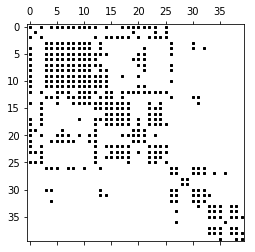

In [20]:
plt.spy(A_spatial, markersize=2, color='black')
plt.show()

In [21]:
X_train, y_train, X_val, y_val = prepare_data(X, y, 0.7)

In [22]:
L, X_train_graph, X_val_graph = structure_data(A_spatial, X_train, X_val)

Layer 0: M_0 = |V| = 56 nodes (16 added),|E| = 190 edges
Layer 1: M_1 = |V| = 28 nodes (7 added),|E| = 74 edges
Layer 2: M_2 = |V| = 14 nodes (2 added),|E| = 30 edges
Layer 3: M_3 = |V| = 7 nodes (0 added),|E| = 10 edges


In [12]:
params = graph_model_params(n_filter=20, dense_size=20, 
                            n_graph=n_coef, keep_prob=0.9,
                            epochs=10, batch_size=20, 
                            n_train=X_train.shape[0], verbose=False)

In [13]:
model = multi_cgcnn(L, **params)

NN architecture
  input: M_0 = 56
  layer 1: cgconv1
    representation: M_0 * F_1 / p_1 = 56 * 20 / 2 = 560
    weights: F_0 * F_1 * K_1 = 1 * 20 * 10 = 200
    biases: F_1 = 20
  layer 2: cgconv2
    representation: M_1 * F_2 / p_2 = 28 * 20 / 4 = 140
    weights: F_1 * F_2 * K_2 = 20 * 20 * 10 = 4000
    biases: F_2 = 20
  layer 3: fc1
    representation: M_3 = 20
    weights: M_2 * M_3 = 140 * 20 = 2800
    biases: M_3 = 20
  layer 4: logits (softmax)
    representation: M_4 = 2
    weights: M_3 * M_4 = 20 * 2 = 40
    biases: M_4 = 2


In [14]:
accuracy, loss, t_step = model.fit(X_train_graph, y_train, X_val_graph, y_val)

step 362 / 362 (epoch 9.99 / 10):
  learning_rate = 6.30e-04, loss_average = 6.39e-01
  validation accuracy: 74.60 (232 / 311), f1 (weighted): 74.55, loss: 6.61e-01
  time: 129s (wall 45s)
validation accuracy: peak = 74.60, mean = 74.60
